In [3]:
import math
import nilearn as ni
from nilearn import plotting
from nilearn import image
from nilearn.image import math_img
from nilearn.image import index_img
from nilearn.regions import connected_regions
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import numpy as np

oldfont = plt.rcParams['font.sans-serif']
plt.rcParams['font.sans-serif'] = ['Helvetica']


# Metacognition in the cognitive architecture

## The CMC

In [9]:
wm = image.load_img("rois/cmc/wm_optimized.nii")
action = image.load_img("rois/cmc/action_optimized.nii")
ltm = image.load_img("rois/cmc/ltm_optimized.nii")
perception = image.load_img("rois/cmc/perception_optimized.nii")
pm = image.load_img("rois/cmc/procedural_optimized.nii")

IMAGES = [wm, ltm, action, pm,  perception]
NAMES = ["Working Memory", "Long-Term Memory", "Action", "Procedural", "Perception"]
BRAIN_NAMES = ["Prefrontal Cortex", "Medial Temporal Cortex", "Motor Cortex", "Basal Ganglia", "Visual Cortex"]
COLORS = ["aqua", "orange", "darkorchid", "limegreen", "tomato"]

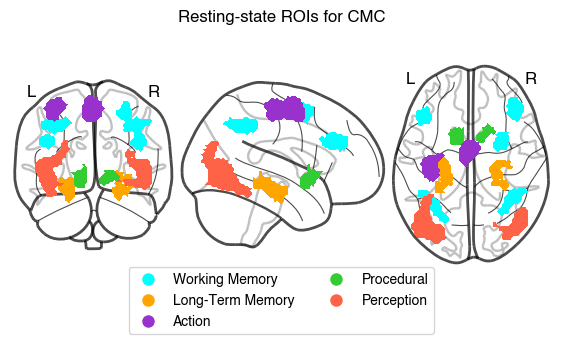

In [5]:
fig, axs = plt.subplots(1,1, figsize=(7, 3.5))
display = plotting.plot_glass_brain(None, axes=axs)
for img, col in zip(IMAGES, COLORS):
    display.add_contours(img, levels=[0.001], filled=True, colors=col)

handles = [Line2D([0], [0], marker='o', markerfacecolor=x, color="w", markersize=10) for x in COLORS]

axs.set_title("Resting-state ROIs for CMC")
fig.legend(handles, NAMES, loc="lower center", ncol=2)
plt.savefig("cmc_regions_optimized.png")
plt.show()

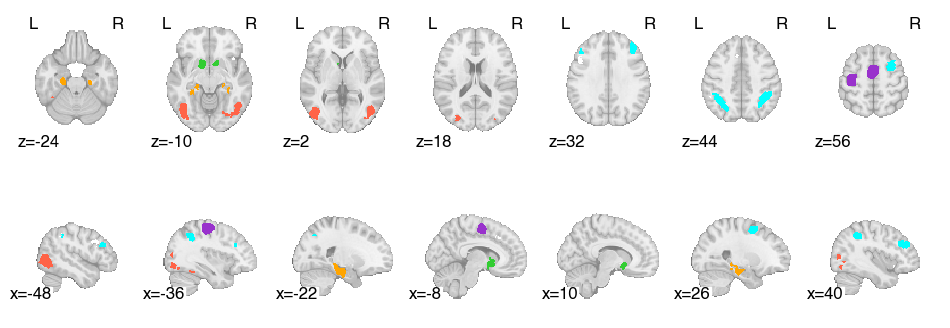

In [35]:
fig, axs = plt.subplots(2,1, figsize=(12, 4))
display = plotting.plot_stat_map("z_corr-FDR_method-indep.nii.gz", threshold=3, display_mode="z", axes=axs[0], 
                                 annotate=True, colorbar=False)
for img, col in zip(IMAGES, COLORS):
    display.add_contours(img, levels=[0.001], filled=True, colors=col)
display = plotting.plot_stat_map("z_corr-FDR_method-indep.nii.gz", threshold=3, display_mode="x", axes=axs[1], 
                                 annotate=True, colorbar=False)
for img, col in zip(IMAGES, COLORS):
    display.add_contours(img, levels=[0.001], filled=True, colors=col)
plt.show()

## Meta-analysis

### Feeling of Knowing

## 3D Rendering

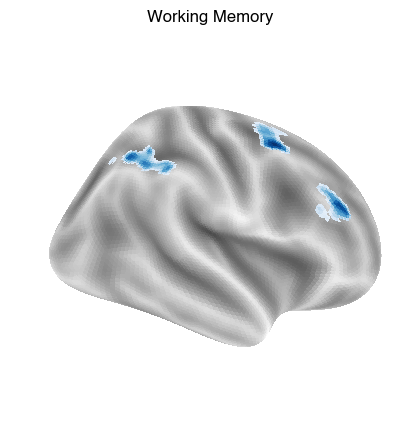

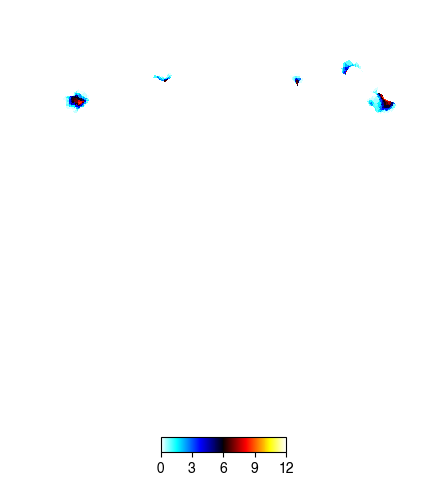

In [13]:
from nilearn import datasets
from nilearn import surface

fsaverage = datasets.fetch_surf_fsaverage()

wm_surf = surface.vol_to_surf(wm, fsaverage.pial_right)
pm_surf = surface.vol_to_surf(perception, fsaverage.pial_right)

plotting.plot_surf_stat_map(fsaverage.infl_right, wm_surf, hemi='right',
                            title='Working Memory', colorbar=False, cmap="Blues",
                            threshold=1., bg_map=fsaverage.sulc_right)

plotting.plot_img_on_surf(wm,
                          views=['lateral', 'medial'],
                          hemispheres=['left', 'right'],
                          colorbar=True)
plotting.show()